In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
import os
from pathlib import Path
dir = os.path.realpath('..')
# `cwd`: current directory is straightforward
# cwd = Path.cwd()
# datfile = r'calibration_data/RampTest_2022-01-13_202229.csv'
# datfile = r'calibration_data/StepsTest_2022-01-13_202828.csv'
datfile = r'calibration_data/StepsTest_2022-01-13_202350.csv'
fname = os.path.join(dir, datfile)

In [24]:
df = pd.read_csv(fname)

In [25]:
df['raw esc'] = df['ESC signal (µs)'].copy()
df['ESC signal (µs)'] = df['ESC signal (µs)'].apply(lambda x : (x-1000)/1000)

In [26]:
df['Motor Optical Speed (RPM)'].apply(lambda x: np.power(x,2))

0             0
1       4414201
2      10284849
3      16289296
4      22410756
5      28590409
6      34880836
7      41242084
8      49449024
9      58232161
10     67010596
11     78021889
12     88774084
13     99321156
14    110712484
15    124099600
Name: Motor Optical Speed (RPM), dtype: int64

In [27]:
df['SpeedPWMfit'] = 2257.7 + 9390.9*df['ESC signal (µs)']
df['ThrustSpeedfit'] = (3e-8)*(df['Motor Optical Speed (RPM)'].apply(lambda x: np.power(x,2)))
df['TorqueSpeedfit'] = (6e-10)*(df['Motor Optical Speed (RPM)'].apply(lambda x: np.power(x,2)))

•	RPM vs. PWM curve
•	Thrust vs. PWM curve
•	Efficiency vs. RPM
•	Thrust vs. RPM
•	Torque vs. RPM

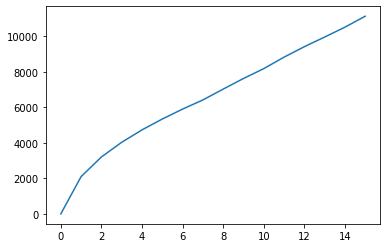

In [28]:
plt.plot(df['Motor Optical Speed (RPM)'])

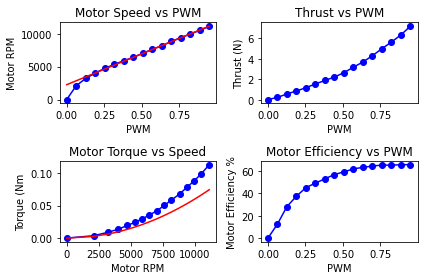

In [29]:
# plt.style('-.')
plt.subplot(2,2,1)
plt.plot(df['ESC signal (µs)'],df['Motor Optical Speed (RPM)'],'bo-')
plt.plot(df['ESC signal (µs)'],df['SpeedPWMfit'],'r-')
plt.title('Motor Speed vs PWM')
plt.xlabel('PWM')
plt.ylabel('Motor RPM')
plt.subplot(2,2,2)
plt.plot(df['ESC signal (µs)'],df['Thrust (N)'],'bo-')

plt.title('Thrust vs PWM')
plt.ylabel('Thrust (N)')
plt.xlabel('PWM')
plt.subplot(2,2,3)
plt.plot(df['Motor Optical Speed (RPM)'],df['Torque (N·m)'],'bo-')
plt.plot(df['Motor Optical Speed (RPM)'],df['TorqueSpeedfit'],'r-')

plt.title('Motor Torque vs Speed')
plt.ylabel('Torque (Nm')
plt.xlabel('Motor RPM')
plt.subplot(2,2,4)
plt.plot(df['ESC signal (µs)'],df['Motor Efficiency (%)'],'bo-')
# plt.plot(df['Motor Optical Speed (RPM)'],df['Torque (N·m)'])
plt.title('Motor Efficiency vs PWM')
plt.ylabel('Motor Efficiency %')
plt.xlabel('PWM')
plt.tight_layout()

Text(0.5, 0, 'Motor Speed RPM')

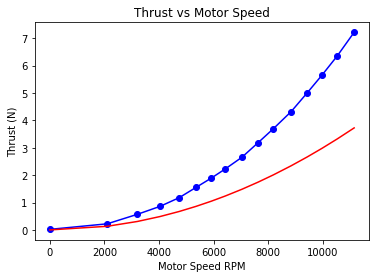

In [30]:
plt.plot(df['Motor Optical Speed (RPM)'],df['Thrust (N)'],'bo-')
plt.plot(df['Motor Optical Speed (RPM)'],df['ThrustSpeedfit'],'r-')
plt.title('Thrust vs Motor Speed')
plt.ylabel('Thrust (N)')
plt.xlabel('Motor Speed RPM')

In [31]:
df.columns

Index(['Time (s)', 'ESC signal (µs)', 'Servo 1 (µs)', 'Servo 2 (µs)',
       'Servo 3 (µs)', 'AccX (g)', 'AccY (g)', 'AccZ (g)', 'Torque (N·m)',
       'Thrust (N)', 'Voltage (V)', 'Current (A)',
       'Motor Electrical Speed (RPM)', 'Motor Optical Speed (RPM)',
       'Electrical Power (W)', 'Mechanical Power (W)', 'Motor Efficiency (%)',
       'Propeller Mech. Efficiency (N/W)', 'Overall Efficiency (N/W)',
       'Vibration (g)', 'App message', 'Unnamed: 21', 'raw esc', 'SpeedPWMfit',
       'ThrustSpeedfit', 'TorqueSpeedfit'],
      dtype='object')

<AxesSubplot:>

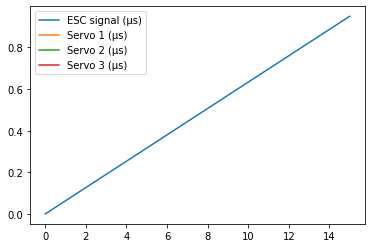

In [32]:
df[['ESC signal (µs)', 'Servo 1 (µs)', 'Servo 2 (µs)',
       'Servo 3 (µs)']].plot()

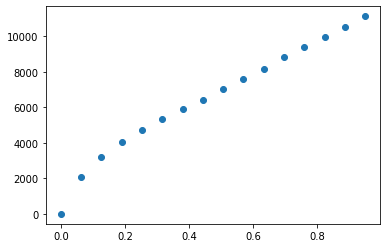

In [33]:
plt.scatter(df['ESC signal (µs)'],df['Motor Optical Speed (RPM)'])